<a href="https://colab.research.google.com/github/fedhere/PUS2024/blob/main/ClassDemos/PUS_clustering_building_km_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pylab as plt
import numpy as np
import pandas as pd

In [ ]:
url = "https://www1.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_2017_consumption_data.xlsx"
df = pd.read_excel(url, "Information and Metrics")

In [ ]:
df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34350,34682,6682473,Mitchell Hill- 2802 Clarendon Road,NaN,NaN,3.051940e+09,3-05194-0001,3119966,2802 Clarendon Road,NaN,...,NaN,NaT,187.1,160.2,26.8,295851.5,9019.86,Not found,2019-03-07,Not found
34351,34683,6682474,Mitchell Hill- 1116 Carroll Street,NaN,NaN,3.012880e+09,3-01288-0038,3033818,1116 Carroll Street,NaN,...,NaN,NaT,181.2,157.7,23.5,283262.5,8756.18,Not found,2019-03-07,Not found
34352,34684,6682477,Mitchell Hill- 3033 Brighton 13 Street,NaN,NaN,3.087160e+09,3-08716-0085,3245653,3033 Brighton 13 Street,NaN,...,NaN,NaT,230.4,177.0,53.3,451795.0,13366.71,Not found,2019-03-07,Not found
34353,34685,2819133,The Ritz Tower - 465 Park Avenue,NaN,NaN,1.013128e+09,1-01312-7502,1036922,465 Park Avenue,NaN,...,NaN,NaT,614.8,23.7,591.1,7118.2,27.04,Not found,2019-03-08,Not found


In [ ]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2 (self-reported)', 'Postal Code', 'Street Number',
       'Street Name', 'Borough', 'DOF Gross Floor Area (ft²)',
       'Self-Reported Gross Floor Area (ft²)',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'ENERGY STAR Score', 'Source EUI (kBtu/ft²)',


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Order                                                       34355 non-null  int64         
 1   Property Id                                                 34355 non-null  int64         
 2   Property Name                                               34355 non-null  object        
 3   Parent Property Id                                          1723 non-null   object        
 4   Parent Property Name                                        1723 non-null   object        
 5   BBL - 10 digits                                             33625 non-null  float64       
 6   NYC Borough, Block and Lot (BBL) self-reported              33626 non-null  object        
 7   NYC Building Identific

lots of data: lets dramatically simplify the problem. Lets use only 2 variables so we can visualize the clustering outcomes

In [ ]:
year = 'Year Built'
elec = "Electricity Use - Grid Purchase (kBtu)"

features = df[[year, elec]]

In [ ]:
features

,Year Built,Electricity Use - Grid Purchase (kBtu)
0,1909,6551394.1
1,1963,616343.7
2,1999,8033914.4
3,1994,1976691.9
4,2012,1022951.6
...,...,...
34350,1931,316524.4
34351,1925,277672.0
34352,1926,629677.8
34353,1910,6979300.9


In [ ]:
initial_shape = features.shape #reocrd the shape to assess data loss in preprocessing

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              34355 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 536.9 KB


There are missing data: lets analyze how they are distributed to decide how to deal with them

<Axes: >

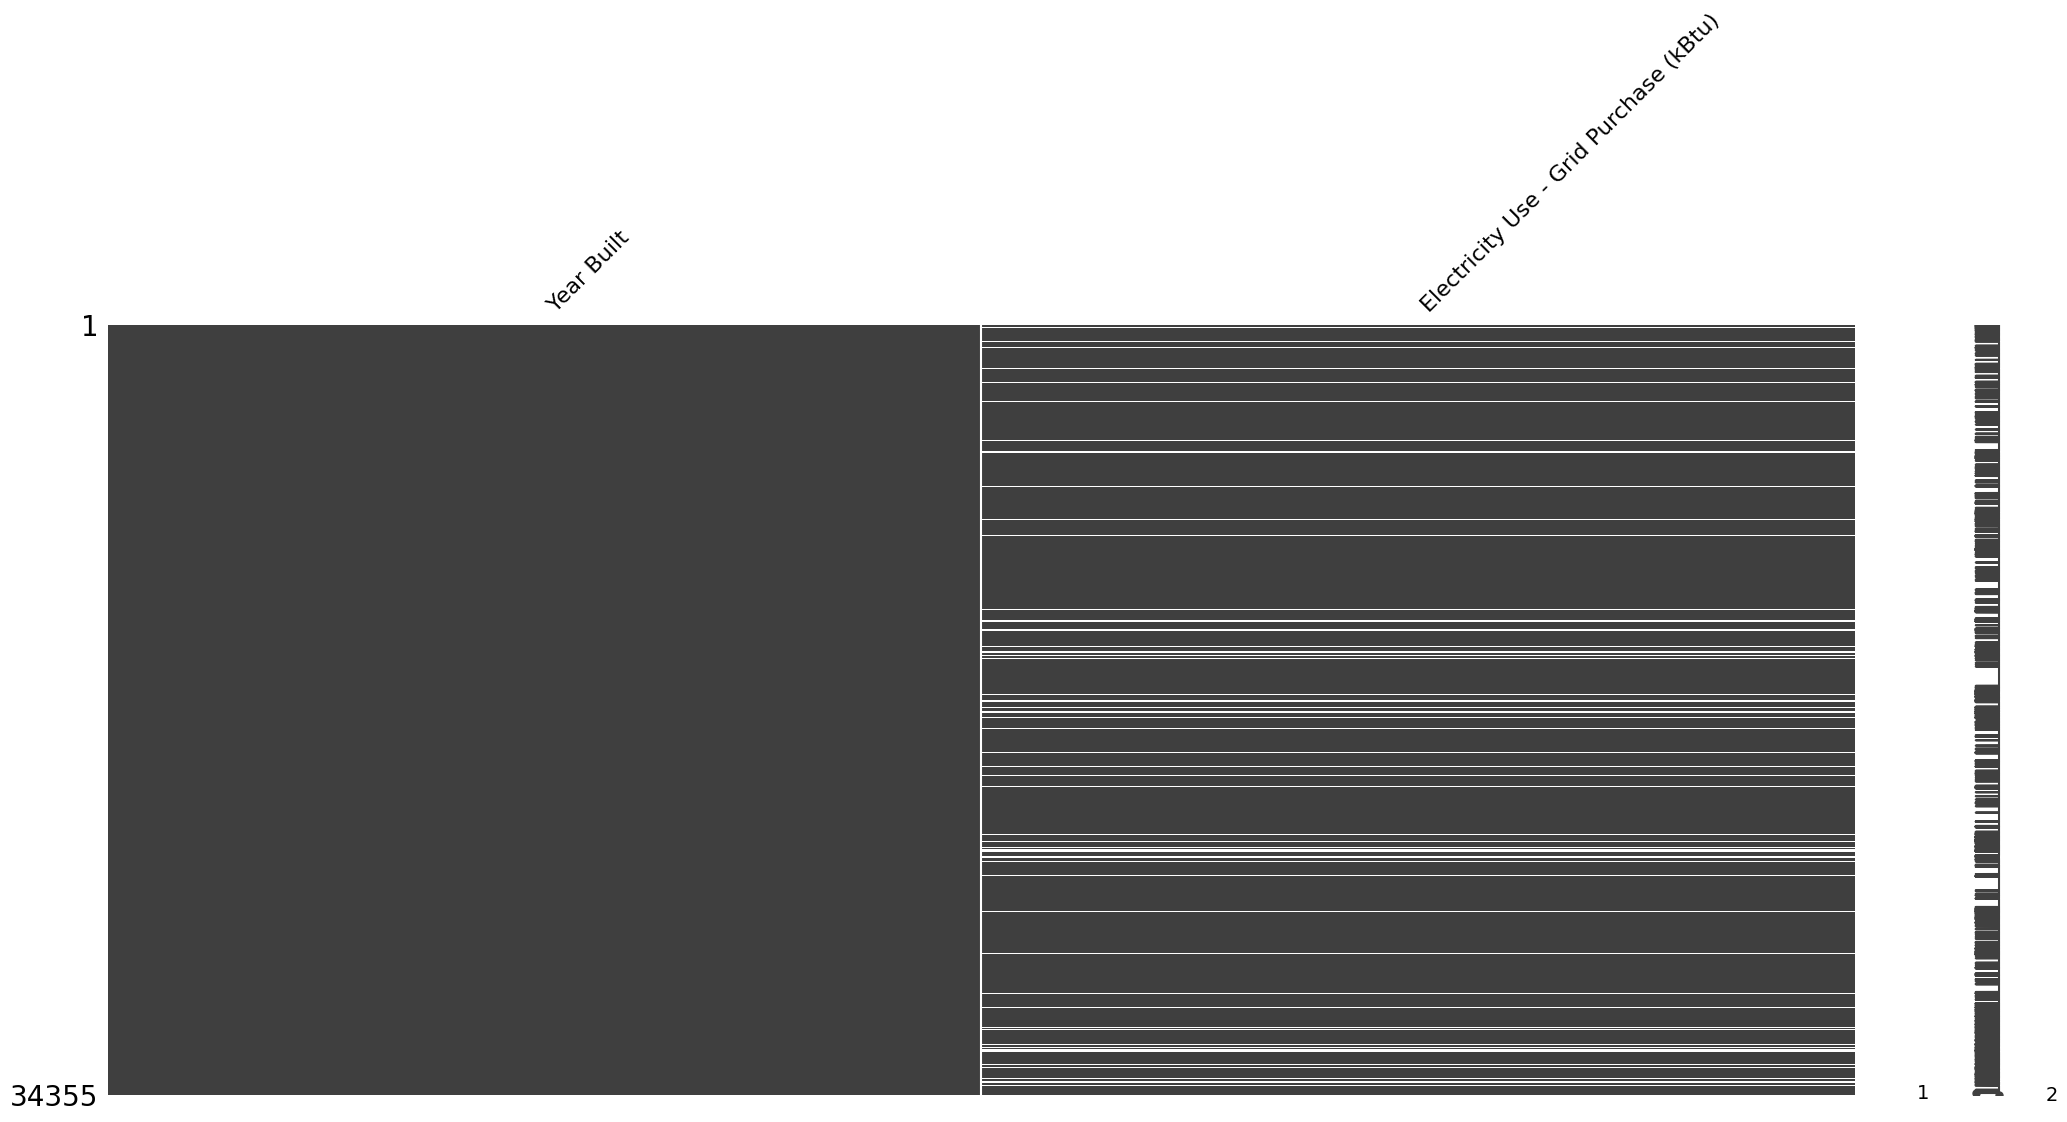

In [ ]:
import missingno as msno
msno.matrix(features)

In [ ]:
features.dropna(inplace=True)

<ipython-input-13-aa60b42c2688>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


In [ ]:
features.isna().sum()

,0
Year Built,0
Electricity Use - Grid Purchase (kBtu),0


In [ ]:
print("lost {:.2f} % of the data".format((initial_shape[0] - features.shape[0]) / initial_shape[0] * 100 ))

lost 8.09 % of the data


In [ ]:
features.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,31576.000000,3.157600e+04
mean,1945.994141,3.833599e+06
std,32.791648,1.249719e+07
min,1051.000000,-6.343300e+03
25%,1924.000000,6.888429e+05
50%,1935.000000,1.249026e+06
75%,1964.000000,2.828563e+06
max,2021.000000,5.742834e+08


things to notice: negative minimum for electricity use, buildings as old as 1051 that were built before electricity was invented. Solution => drop data by threshold (like in the midterm)

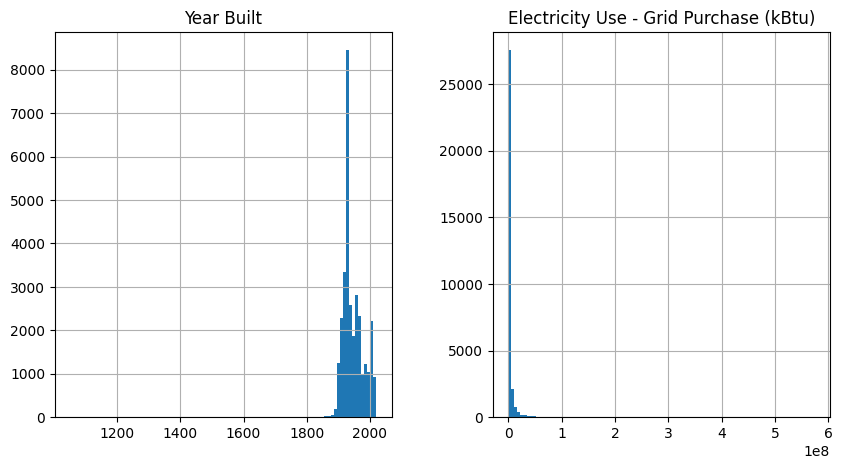

In [ ]:
features.hist(figsize=(10,5), bins=100); #how many bins should you use? a reasonable choice is ~ the square root of the number of objects in the data

In [ ]:
features = features[features[year] > 1900]
features = features[features[elec] > 0]

In [ ]:
print("lost {:.2f} % of the data".format((initial_shape[0] - features.shape[0]) / initial_shape[0] * 100 ))

lost 11.93 % of the data


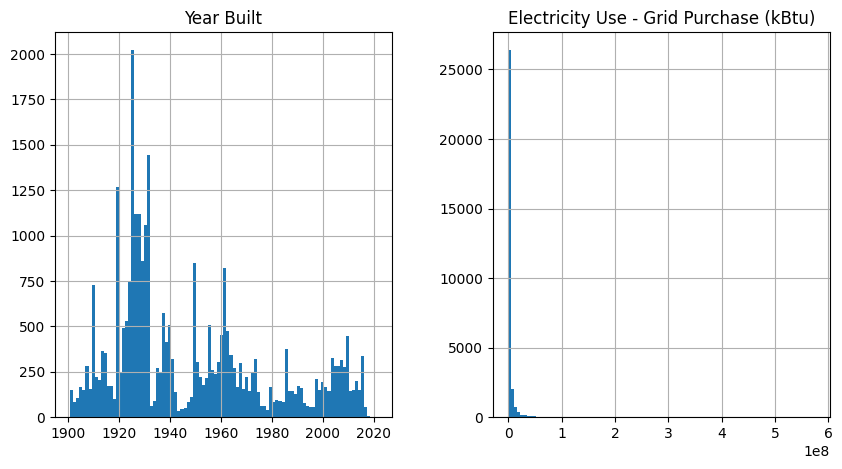

In [ ]:
features.hist(figsize=(10,5), bins=100);

things to notice: the distribution of electricity usage is very peaked near 0 with a long tail. Solution => use log

Also note: electric usage is in units of 1e8 = 10,000,000. Going to log scale will make this go into units range.



In [ ]:
features[elec] = np.log10(features[elec])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-123-22a365dea7a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[elec] = np.log10(features[elec])


In [ ]:
features

,Year Built,Electricity Use - Grid Purchase (kBtu)
0,1909,6.816334
1,1963,5.789823
2,1999,6.904927
3,1994,6.295939
4,2012,6.009855
...,...,...
34350,1931,5.500407
34351,1925,5.443532
34352,1926,5.799118
34353,1910,6.843812


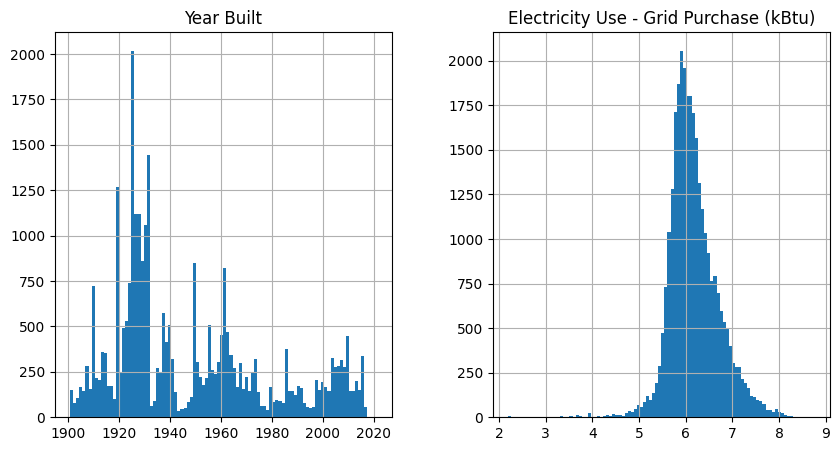

In [ ]:
features.hist(figsize=(10,5), bins=100);

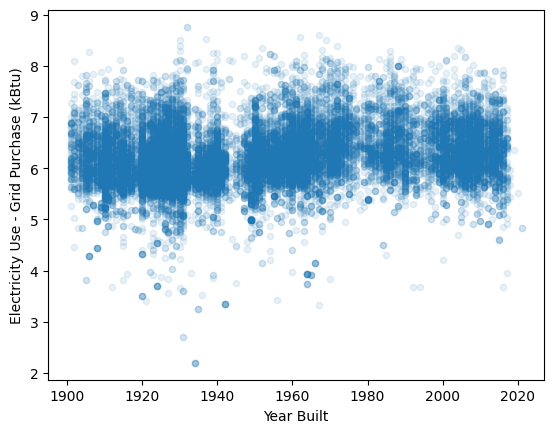

In [ ]:
features.plot(year, elec, kind="scatter", alpha=0.1);

In [ ]:
features

,Year Built,Electricity Use - Grid Purchase (kBtu)
0,1909,6.816334
1,1963,5.789823
2,1999,6.904927
3,1994,6.295939
4,2012,6.009855
...,...,...
34350,1931,5.500407
34351,1925,5.443532
34352,1926,5.799118
34353,1910,6.843812


are there groups of buildings that can be naturally put together for which specific policies can be applied? example aplication: direct a campain for upgrades

In [ ]:
np.log(features[year] - 1980)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Year Built
0,NaN
1,NaN
2,2.944439
3,2.639057
4,3.465736
...,...
34350,NaN
34351,NaN
34352,NaN
34353,NaN


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


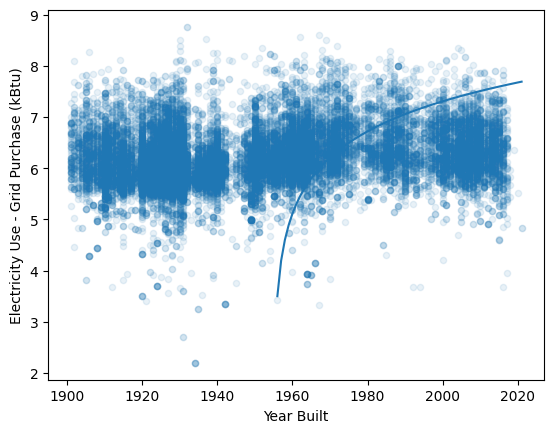

In [ ]:
features.plot(year, elec, kind="scatter", alpha=0.1);
plt.plot(features[year].sort_values(), np.log((features[year].sort_values() - 1955)**1) + 3.5)
features_nearlog = features.copy()
features_nearlog["lowdens"] = np.log((features[year] - 1955)**1) + 3.5
#np.log(np.abs((features[year] - 1950)**2))

In [ ]:
filter = features_nearlog[year] > 1960

In [ ]:
features_nearlog.loc[filter][[year, elec]], \
features_nearlog.loc[filter][[year, "lowdens"]]
features_nearlog.loc[filter]

,Year Built,Electricity Use - Grid Purchase (kBtu),lowdens
1,1963,5.789823,5.579442
2,1999,6.904927,7.284190
3,1994,6.295939,7.163562
4,2012,6.009855,7.543051
6,1999,6.882095,7.284190
...,...,...,...
34342,2008,5.970376,7.470292
34347,2008,5.623491,7.470292
34348,1963,5.695875,5.579442
34349,2008,5.623491,7.470292


In [ ]:
features_nearlog.loc[filter][[year, elec]].values.shape

(9478, 2)

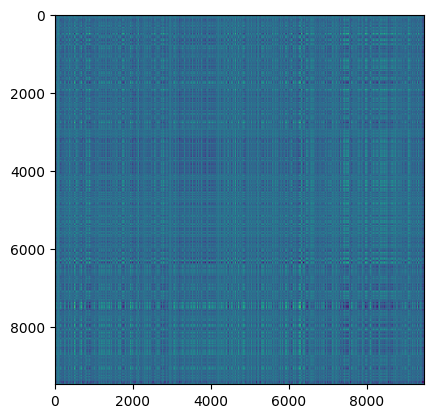

In [ ]:
import pylab as plt
from scipy.spatial import distance

distances = distance.cdist(features_nearlog.loc[filter][[year, elec]].values,
                                   features_nearlog.loc[filter][[year, "lowdens"]].values)
plt.imshow(distances)

(5.033988644588696e-07, 1.0)

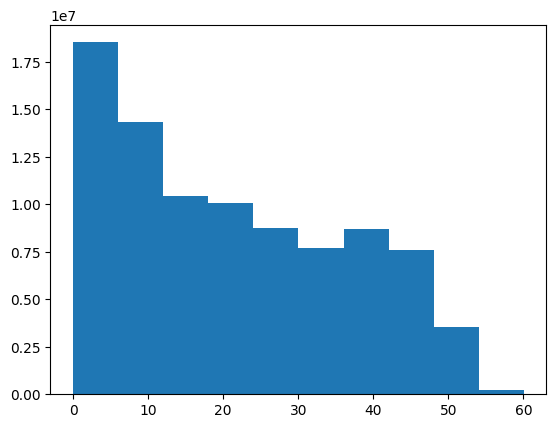

In [ ]:
plt.hist(distances.flatten())
distances = distances / distances.max()
distances.min(), distances.max()

In [ ]:
distance_filter = distances < 1e-3
filter_by_distance = distance_filter.sum(axis=1).astype(bool)

features[filter][filter_by_distance]
filter_by_distance.sum(), filter_by_distance.shape, filter.shape

(311, (9478,), (30256,))

In [ ]:
features.loc[filter].loc[filter_by_distance]

,Year Built,Electricity Use - Grid Purchase (kBtu)
177,2009,7.437120
200,2006,7.410536
352,2000,7.277020
354,2008,7.474861
360,2008,7.474861
...,...,...
33309,1965,5.772180
33585,1987,6.973185
33697,1987,6.973185
33875,1987,6.973185


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


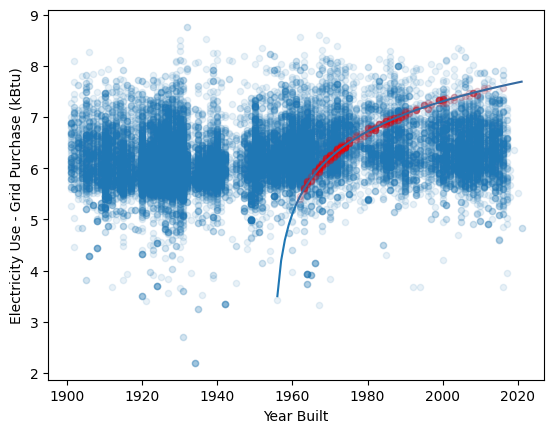

In [ ]:
ax = features.plot(year, elec, kind="scatter", alpha=0.1);
plt.plot(features[year].sort_values(), np.log((features[year].sort_values() - 1955)**1) + 3.5)
plt.plot(features.loc[filter][year].sort_values(),
         np.log((features.loc[filter][year].sort_values() - 1955)**1) + 3.5, 'r', alpha=0.1)
features.loc[filter].loc[filter_by_distance].plot(year, elec, kind="scatter", alpha=0.1, color="red", ax=ax);
features_nearlog = features.copy()
features_nearlog["lowdens"] = np.log((features[year] - 1955)**1) + 3.5
#np.log(np.abs((features[year] - 1950)**2))

In [ ]:
features2 = features.drop(features.loc[filter].loc[filter_by_distance].index)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


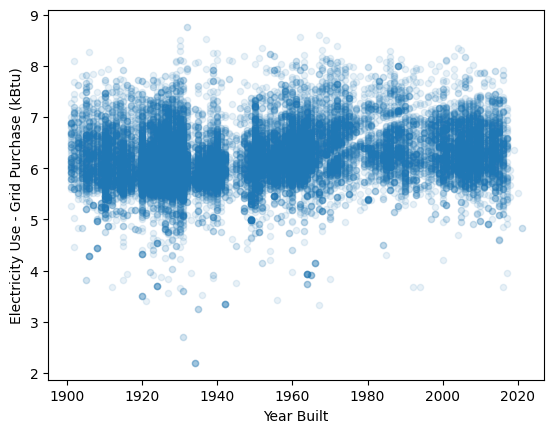

In [ ]:
ax = features2.plot(year, elec, kind="scatter", alpha=0.1);
features_nearlog = features.copy()
features_nearlog["lowdens"] = np.log((features[year] - 1955)**1) + 3.5
#np.log(np.abs((features[year] - 1950)**2))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3, random_state=123, verbose=True)
km.fit(features2)

Initialization complete
Iteration 0, inertia 2495900.216119073.
Iteration 1, inertia 2490042.174525356.
Iteration 2, inertia 2489725.0768960877.
Converged at iteration 2: strict convergence.


KMeans(n_clusters=3, random_state=123, verbose=True)

In [ ]:
km.n_clusters

3

In [ ]:
km.cluster_centers_

array([[1924.96005436,    6.03906819],
       [2001.2518887 ,    6.38106864],
       [1960.41092824,    6.29780666]])

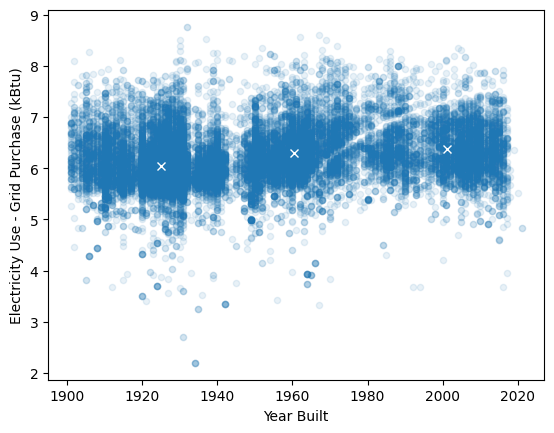

In [ ]:
features2.plot(year, elec, kind="scatter", alpha=0.1)
for cc in range(km.n_clusters):
  plt.plot(km.cluster_centers_[cc, 0],
           km.cluster_centers_[cc, 1], 'wx')

In [ ]:
km.labels_.shape

(29945,)

Text(0, 0.5, 'Electricity Use')

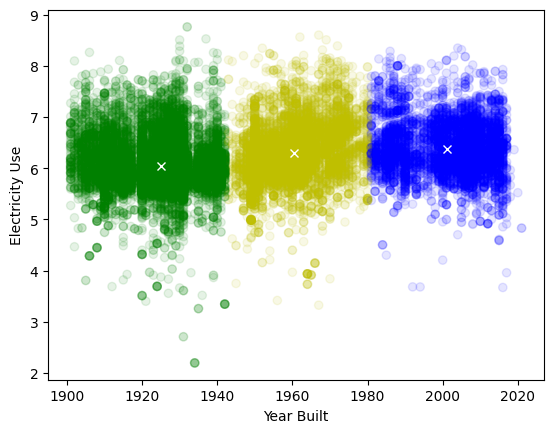

In [ ]:
colors = np.array(['g', 'b', 'y', 'k', 'c', 'm'])
plt.scatter(features2[year], features2[elec],
            color=colors[km.labels_], alpha=0.1)

for cc in range(km.n_clusters):
  plt.plot(km.cluster_centers_[cc, 0],
           km.cluster_centers_[cc, 1], 'wx')
plt.xlabel('Year Built')
plt.ylabel("Electricity Use")

the groups are split horizontally. Why?? Solution => standardize

In [ ]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29945 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              29945 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  29945 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 701.8 KB


things to notice: year built is an integer

In [ ]:
features2[year] = features2[year].astype(float)

In [ ]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29945 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              29945 non-null  float64
 1   Electricity Use - Grid Purchase (kBtu)  29945 non-null  float64
dtypes: float64(2)
memory usage: 701.8 KB


In [ ]:
features2.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,29945.000000,29945.000000
mean,1947.778060,6.166674
std,30.591901,0.527387
min,1901.000000,2.195900
25%,1925.000000,5.839502
50%,1937.000000,6.092986
75%,1965.000000,6.444709
max,2021.000000,8.759126


In [ ]:
from sklearn import preprocessing
features_scaled = preprocessing.scale(features2.values, axis=0)
features_scaled

array([[-1.26761354,  1.23186701],
       [ 0.49758904, -0.71457454],
       [ 1.67439076,  1.39985553],
       ...,
       [-0.71190162, -0.69694882],
       [-1.2349246 ,  1.28397042],
       [ 0.98792309,  0.58222116]])

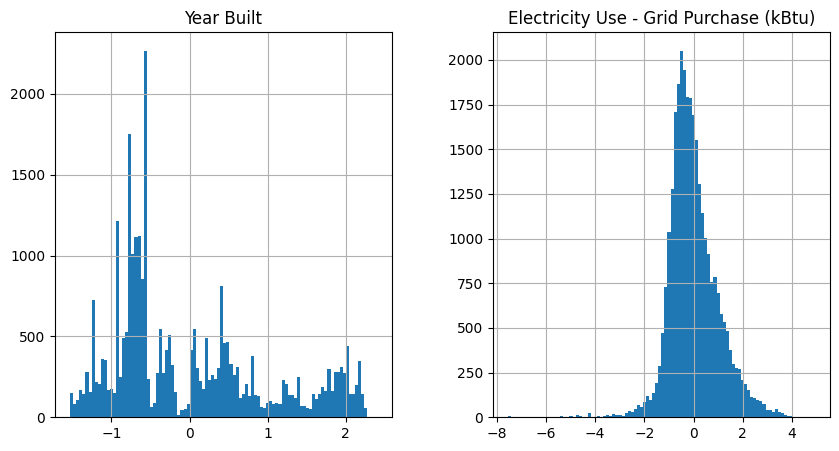

In [ ]:
features_df = pd.DataFrame(features_scaled, columns=[year, elec])
features_df.hist(figsize=(10,5), bins=100);

In [ ]:
km = KMeans(n_clusters=3, random_state=123, verbose=True)
km.fit(features_scaled)

Initialization complete
Iteration 0, inertia 31112.632848622467.
Iteration 1, inertia 26165.315088682913.
Iteration 2, inertia 25211.495029892107.
Iteration 3, inertia 24919.799347424905.
Iteration 4, inertia 24764.297661019697.
Iteration 5, inertia 24653.164585748094.
Iteration 6, inertia 24542.839267539082.
Iteration 7, inertia 24437.039907867784.
Iteration 8, inertia 24316.009516201466.
Iteration 9, inertia 24200.491081523895.
Iteration 10, inertia 24086.34736665633.
Iteration 11, inertia 23996.88856359432.
Iteration 12, inertia 23924.50352321236.
Iteration 13, inertia 23867.94080887731.
Iteration 14, inertia 23824.75240109595.
Iteration 15, inertia 23796.872698346924.
Iteration 16, inertia 23779.117694710698.
Iteration 17, inertia 23768.5132310469.
Iteration 18, inertia 23760.96236254585.
Iteration 19, inertia 23755.508897064337.
Iteration 20, inertia 23751.162634830405.
Iteration 21, inertia 23749.659704834652.
Converged at iteration 21: center shift 3.517848335816219e-05 within t

KMeans(n_clusters=3, random_state=123, verbose=True)

Text(0, 0.5, 'Electricity Use')

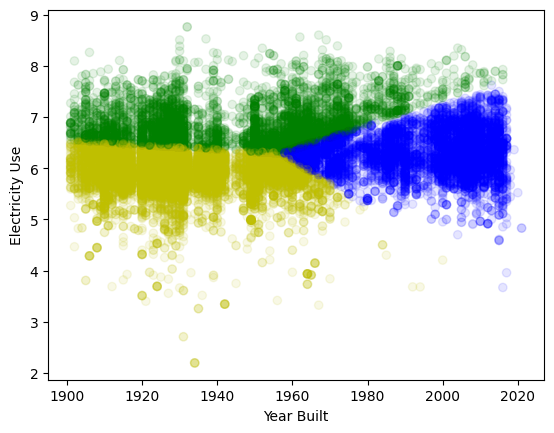

In [ ]:
colors = np.array(['g', 'b', 'y', 'k', 'c', 'm'])
plt.scatter(features2[year], features2[elec],
            color=colors[km.labels_], alpha=0.1)

#for cc in range(km.n_clusters):
#  plt.plot(km.cluster_centers_[cc, 0],
#           km.cluster_centers_[cc, 1], 'wx')

plt.xlabel('Year Built')
plt.ylabel("Electricity Use")

Text(0, 0.5, 'Electricity Use - scaled')

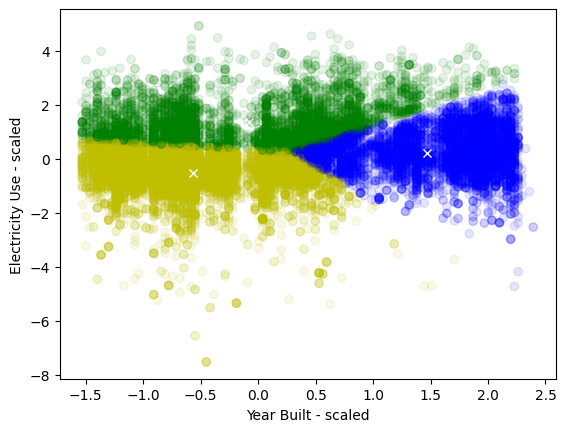

In [ ]:
colors = np.array(['g', 'b', 'y', 'k', 'c', 'm'])
plt.scatter(features_scaled[:,0], features_scaled[:,1],
            color=colors[km.labels_], alpha=0.1)
for cc in range(km.n_clusters):
  plt.plot(km.cluster_centers_[cc, 0],
           km.cluster_centers_[cc, 1], 'wx')

plt.xlabel('Year Built - scaled')
plt.ylabel("Electricity Use - scaled")

number of clusters: 500
number of outliers: -380


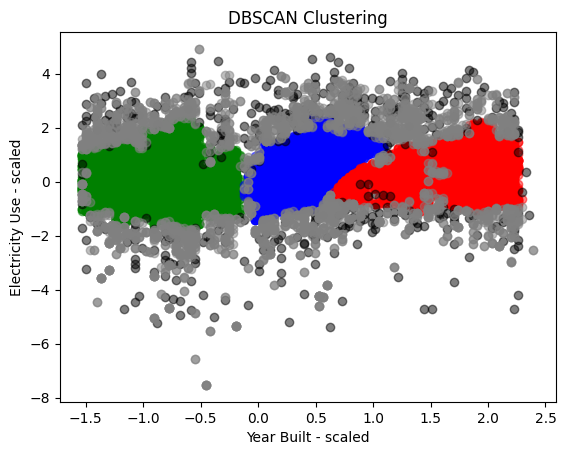

In [ ]:
# prompt: cluster the same data with dbscan

from sklearn.cluster import DBSCAN
from matplotlib import colormaps


# Assuming features_scaled is your preprocessed data
# You can adjust the eps and min_samples parameters based on your data
dbscan = DBSCAN(eps=0.05, min_samples=2)
dbscan.fit(features_scaled)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_
print("number of clusters:", labels.max() + 1)
print("number of outliers:", labels[labels==-1].sum())

#sorting labels by number of objects in cluster
clusters_by_size = np.unique(dbscan.labels_, return_counts=True)[1].argsort()
# Visualize the clusters
colors = np.array(['k', 'g', 'b', "r", 'gray'])#, 'c', 'm', 'r', "w"])#,  "gray"])
for i in np.unique(dbscan.labels_, return_counts=True)[0][clusters_by_size[::-1]]:
  c = min(i + 1, len(colors) - 1)
  plt.scatter(features_scaled[labels == i, 0], features_scaled[labels == i, 1],
            #cmap="Accent",
              c=colors[c], alpha=0.5, label="cluster %c"%c)

plt.xlabel('Year Built - scaled')
plt.ylabel("Electricity Use - scaled")
plt.title("DBSCAN Clustering")
#plt.legend()
plt.show()

# You can further analyze the clusters by looking at the labels
# For example, you can count the number of points in each cluster
# or calculate the average values of features for each cluster

In [ ]:
np.unique(dbscan.labels_, return_counts=True)[1][np.unique(dbscan.labels_, return_counts=True)[1].argsort()[::-1]]

array([15785,  5986,  5005,   380,    83,    70,    48,    46,    37,
          35,    35,    31,    31,    31,    24,    23,    23,    22,
          22,    22,    21,    20,    20,    20,    20,    19,    19,
          19,    18,    18,    18,    17,    16,    15,    15,    15,
          14,    14,    14,    13,    13,    12,    12,    11,    11,
          11,    11,    11,    11,    10,    10,    10,    10,    10,
          10,    10,    10,    10,    10,    10,    10,    10,     9,
           9,     9,     9,     9,     9,     9,     9,     9,     9,
           9,     9,     9,     9,     9,     9,     8,     8,     8,
           8,     8,     8,     8,     8,     8,     8,     8,     7,
           7,     7,     7,     7,     7,     7,     7,     7,     7,
           7,     7,     7,     7,     7,     7,     7,     7,     7,
           7,     7,     7,     7,     7,     7,     7,     7,     7,
           7,     7,     6,     6,     6,     6,     6,     6,     6,
           6,     6,

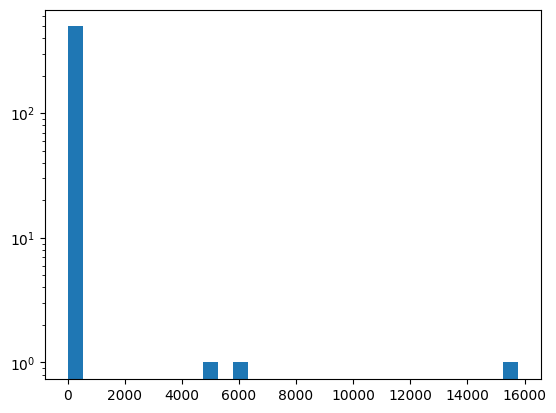

In [ ]:
plt.hist(np.unique(dbscan.labels_, return_counts=True)[1], bins=30)
plt.yscale("log")
#plt.xscale("log")

In [ ]:
labels[labels==-1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 array([  172, 29547,     6,    13,     3,     4,     5,     5,    15,
            4,     4,     7,    43,     6,     5,     4,     3,     3,
            5,     3,    12,    15,     7,     3,     3,     3,     8,
            3,     8,     8,     5,     5,     3,    12,     9,    14,
           32,     5,     4,     3,    16,     3,     5,     3,     4,
            4,     3,     5,     6,     4,    11,     6,     8,     7,
            7,     5,     7,    17,     5,     5,     6,     7,     3,
            6,     3,     4,     7,     3,     3,    12,     3,     4,
            3,     7,     4,     6,     6,     4,     3,  

In [ ]:
dbscan.labels_.shape

(30256,)

In [ ]:
features_scaled.shape

(30256, 2)

In [ ]:
np.unique(dbscan.labels_)

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

In [ ]:
inertias = []

for i in range(1,8):
  km = KMeans(n_clusters=i, random_state=123, verbose=True)
  km.fit(features_scaled)
  inertias.append(km.inertia_)


plt.plot(range(1, 8), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
# prompt: cluster the same data with dbscan

from sklearn.cluster import DBSCAN

# Assuming features_scaled is your preprocessed and scaled data

# Create a DBSCAN object
dbscan = DBSCAN(eps=0.05, min_samples=5)  # You can adjust eps and min_samples

# Fit the model to your data
dbscan.fit(features_scaled)

# Get the cluster labels
labels = dbscan.labels_

# Visualize the clusters
colors = np.array(['r', 'g', 'b', 'y', 'k', 'c', 'm', 'orange', 'purple'])
plt.scatter(features_scaled[:, 0], features_scaled[:, 1],
            color=colors[labels % len(colors)], alpha=0.5)

plt.xlabel('Year Built - scaled')
plt.ylabel('Electricity Use - scaled')
plt.title('DBSCAN Clustering')
plt.show()

# You can also analyze the number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)